## Nama Anggota Kelompok

- Dhimas Prakasa Henjo (2009106015) (KETUA)
- Giovani Chadavi Hidayat (2009106001)


## Job Desk

- Dhimas Prakasa Henjo = Data Collecing, Data Preprocessing, Data Analisis dan Visualisasi

- Giovani Chadavi Hidayat = Data Modelling, Evaluasi, dan predict

## Penjelasan Dataset

Dataset yang kami gunakan berasal dari Kaggle dengan link sebagai berikut:
https://www.kaggle.com/datasets/ghousethanedar/smiledetection

Dataset Terdiri dari 2800 Gambar dari 2 Class:
1. Senyum = 1562 Gambar
2. Tidak Senyum = 1238 Gambar

## Penjelasan Project

Wajah Manusia dapat dilihat sedang senyum atau tidak senyum dengan Mata Manusia. Proyek ini dapat mendeteksi wajah manusia yang sedang tersenyum atau tidak tersenyum

## Table of Contect

1.  Nama Anggota Kelompok
2.  JOBDESK
3.  Penjelasan dataset
4.  Penjelasan project
5.  Table of Content
6.  Import Library
7.  Data Collecting
8.  Data Preprocessing
9.  Data Analysis and Visualization
10. Data Modeling
11. Evaluasi

## Import Library

In [90]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import keras, os, cv2
import splitfolders
import seaborn as sns
import matplotlib.image as mpig
from keras.preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Concatenate, Input
from tensorflow.keras import layers, optimizers, datasets
from tensorflow.keras.optimizers import SGD
from sklearn import preprocessing
from pathlib import Path
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.transform import rescale

## Data Collecting

### Read Data

In [43]:
base_path = r'./../datasets/train_folder'

In [44]:
# Membagi Data Pada Train_Folder menjadi 70% Training, 20% Validation, dan 10% Testing
splitfolders.ratio(
    base_path,
    output='PA',
    ratio=(.70,.20,.10)
)

Copying files: 2800 files [00:02, 1378.56 files/s]


In [45]:
train_path = r'./PA/train' #train (data latih)
test_path = r'./PA/test' #test (data testing untuk menguji model)
val_path = r'./PA/val' #validation (validasi untuk data latih)

## Data Preprocessing

### Augmentasi Data

In [46]:
image_path= r'./PA'
train_datagen = ImageDataGenerator(
    image_path,
    rescale=1./255, #nilai yang dengannya kita akan mengalikan data sebelum pemrosesan lainnya. antara 0 dan 1
    horizontal_flip = True, #membalik separuh gambar secara acak
    rotation_range= 30, #nilai dalam derajat (0-180), rentang untuk memutar gambar secara acak
    shear_range=.2, #menerapkan transformasi geser secara acak dengan skala 0.2
    zoom_range=.2, #menerapkan transformasi geser secara acak dengan range 0.2
    fill_mode='nearest' #strategi yang digunakan untuk mengisi piksel yang baru dibuat, yang dapat muncul setelah rotasi atau pergeseran lebar/tinggi.
    
)

val_datagen = ImageDataGenerator(
    image_path,
    rescale=1./255, 
)

test_datagen = ImageDataGenerator(
    image_path,
    rescale=1./255, 
)


### Load Data

In [47]:
print('Banyak Data Traning : ', end="")
train_generator = train_datagen.flow_from_directory(
    train_path, #mengarahkan ke directory train
    target_size = (50,50), #semua gambar akan diubah ukurannya menjadi 150x150
    shuffle=True, #akan mengacak data. Bawaan: Benar. Jika disetel ke False, urutkan data dalam urutan alfanumerik.
    batch_size = 32, #ukuran kumpulan data
    class_mode ='binary' # berarti bahwa label (hanya boleh ada 2)
    
)

print('Banyak Data Testing : ', end="")
test_generator = test_datagen.flow_from_directory(
    test_path, #mengarahkan ke directory test
    target_size = (50,50),
    shuffle=True,
    batch_size = 32,
    class_mode ='binary'
    
)

print('Banyak Data Validation : ', end="")
val_generator = val_datagen.flow_from_directory(
    val_path, #mengarahkan ke directory val
    target_size = (50,50),
    shuffle=True,
    batch_size = 32,
    class_mode ='binary'
    
)

Banyak Data Traning : Found 1959 images belonging to 2 classes.
Banyak Data Testing : Found 282 images belonging to 2 classes.
Banyak Data Validation : Found 559 images belonging to 2 classes.


## Data Analisis Dan Visualisasi

(32, 50, 50, 3)


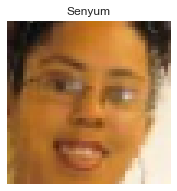

(32, 50, 50, 3)


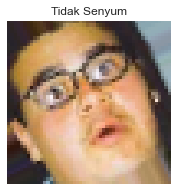

(32, 50, 50, 3)


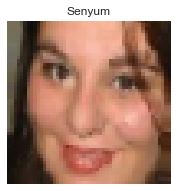

(32, 50, 50, 3)


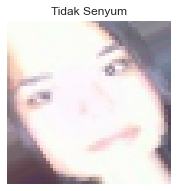

(32, 50, 50, 3)


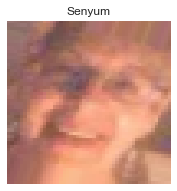

(32, 50, 50, 3)


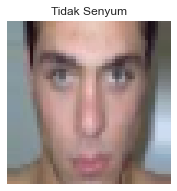

(32, 50, 50, 3)


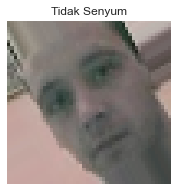

(32, 50, 50, 3)


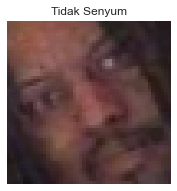

(32, 50, 50, 3)


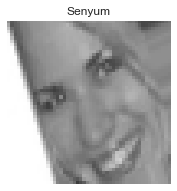

(32, 50, 50, 3)


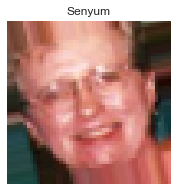

In [48]:
for i in range(10): #perulangan dengan menampilkan 10 gambar
    img, label = train_generator.next()
    print(img.shape)
    plt.figure(figsize=(3, 3))
    plt.imshow(img[0])
    if(label[0] == 0.0):
        plt.title("Senyum")
    else:
        plt.title("Tidak Senyum")
    plt.axis("Off") #menghilangkan grid
    plt.show() #menampilkan gambar

### menampikan visualisasi jumlah data dari 2 class

In [49]:
label_name= ['senyum','tidak_senyum']

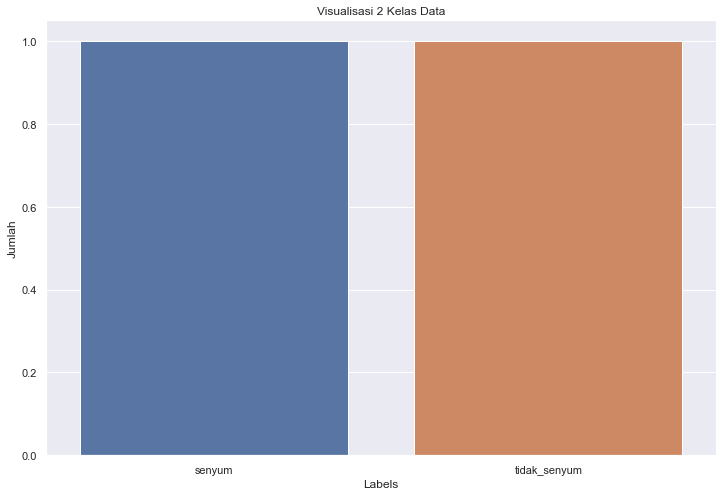

In [50]:
plt.figure(figsize=(12, 8))
sns.set_theme()

sns.countplot(x=label_name)
plt.xlabel('Labels')
plt.ylabel('Jumlah')
plt.title('Visualisasi 2 Kelas Data')
plt.show()

## Data Modelling

In [51]:
model = Sequential([
    Conv2D(128, (3,3), activation='relu', input_shape=(50,50, 3)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(1, activation='sigmoid')

])

In [52]:
model.summary() #Untuk Melihat Struktur Model yang sudah kita buat

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 128)       3584      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 22, 22, 128)       147584    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 11, 11, 128)      0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 15488)             0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [53]:
#Compile model 

model.compile(
    optimizer=tf.keras.optimizers.Adam(), #merupakan metode optimasi yang digunakan.
    loss=tf.keras.losses.binary_crossentropy, #adalah metode pengukuran nilai loss berdasarkan pada nilai apa. karena Membuat flow datanya kita menggunakan binary sehingga pada nilai loss ini kita juga menggunakan binary loss.
    metrics=['accuracy'] #nilai matriks yang diukur pada project ini kita menggunakan nilai akurasi sebagai nilai pengukurannya
)

In [54]:
#Proses Training Model
#merupakan proses dimana machine learning bekerja sehingga algoritma yang sudah kita definisikan dapat mengingat pola dari masing masing kelas pada data yang kita train

history = model.fit(
    train_generator, #data generator yang sudah kita proses
    epochs=20, #banyaknya proses iterasi/ pengulangan pada training
    validation_data = val_generator #validation data yang dievaluasi pada setiap epoch berakhir
)


Epoch 1/20


C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


62/62 [==============================] - 20s 319ms/step - loss: 0.6818 - accuracy: 0.5722 - val_loss: 0.6573 - val_accuracy: 0.6064
Epoch 2/20
62/62 [==============================] - 14s 224ms/step - loss: 0.6507 - accuracy: 0.6304 - val_loss: 0.6251 - val_accuracy: 0.6780
Epoch 3/20
62/62 [==============================] - 14s 232ms/step - loss: 0.6320 - accuracy: 0.6473 - val_loss: 0.5700 - val_accuracy: 0.7191
Epoch 4/20
62/62 [==============================] - 14s 226ms/step - loss: 0.6244 - accuracy: 0.6682 - val_loss: 0.5531 - val_accuracy: 0.7156
Epoch 5/20
62/62 [==============================] - 14s 224ms/step - loss: 0.5882 - accuracy: 0.6947 - val_loss: 0.4909 - val_accuracy: 0.7674
Epoch 6/20
62/62 [==============================] - 16s 251ms/step - loss: 0.5396 - accuracy: 0.7361 - val_loss: 0.4712 - val_accuracy: 0.7871
Epoch 7/20
62/62 [==============================] - 15s 237ms/step - loss: 0.5187 - accuracy: 0.7361 - val_loss: 0.4418 - val_accuracy: 0.8014
Epoch 8/20

In [55]:
model.evaluate(val_generator)

18/18 [==============================] - 1s 54ms/step - loss: 0.3461 - accuracy: 0.8676


[0.34608474373817444, 0.8676207661628723]

In [56]:
model.evaluate(test_generator)

9/9 [==============================] - 1s 159ms/step - loss: 0.3968 - accuracy: 0.8723


[0.3967929780483246, 0.8723404407501221]

In [57]:
model.evaluate(train_generator)

62/62 [==============================] - 4s 70ms/step - loss: 0.4304 - accuracy: 0.8025


[0.4304058253765106, 0.8024502396583557]

## Evaluasi

In [58]:
#train
y_acc_train = history.history['accuracy']
y_acc_val = history.history['val_accuracy']

#validation
y_loss_train = history.history['loss']
y_loss_val = history.history['val_loss']

#epoch
x_ = range(len(y_acc_train))

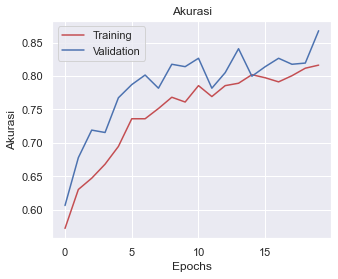

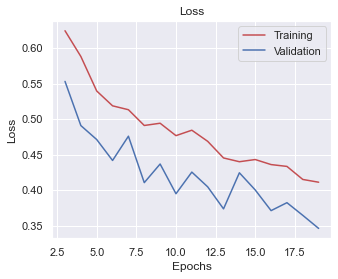

In [59]:
plt.figure(1, figsize=(5,4))
plt.plot(x_, y_acc_train, c='r', label='Training')
plt.plot(x_, y_acc_val, c='b', label='Validation')
plt.title('Akurasi')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

plt.figure(2, figsize=(5,4))
plt.plot(x_[3:], y_loss_train[3:], c='r', label='Training')
plt.plot(x_[3:], y_loss_val[3:], c='b', label='Validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
#Evaluasi Menggunakan Data Testing
test_evaluate = model.evaluate(test_generator,verbose =0)

print(f'Testing loss     : {test_evaluate[0]}')
print(f'Testing accuracy : {round(test_evaluate[1],2)}')

Testing loss     : 0.3967929482460022
Testing accuracy : 0.87


In [65]:
#Simpan Model yang sudah di training
MODEL_BASE_PATH = "model"
SAVE_MODEL_NAME = "model.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At model\model.h5...


## Prediksi

In [66]:
result = model.predict(test_generator)
print(result)


9/9 [==============================] - 1s 58ms/step
[[3.42300594e-01]
 [1.86124817e-03]
 [8.96035910e-01]
 [9.60893810e-01]
 [5.37668243e-02]
 [7.94089317e-01]
 [4.74411398e-01]
 [9.70976055e-01]
 [6.36882126e-01]
 [9.17895317e-01]
 [1.76582232e-01]
 [7.60986090e-01]
 [3.07044741e-02]
 [8.07171285e-01]
 [2.84722876e-02]
 [5.35210036e-03]
 [8.59317124e-01]
 [3.49502936e-02]
 [1.26254710e-03]
 [7.10194945e-01]
 [4.35297161e-01]
 [1.40404910e-01]
 [1.04390841e-03]
 [7.28991985e-01]
 [4.20828432e-01]
 [3.30225565e-02]
 [8.83771852e-02]
 [9.55352545e-01]
 [2.34962925e-02]
 [4.98490110e-02]
 [6.69507325e-01]
 [8.09128523e-01]
 [8.28553438e-01]
 [1.08169056e-01]
 [7.06471264e-01]
 [7.99683630e-02]
 [1.10921850e-02]
 [8.55083019e-02]
 [1.03160888e-01]
 [2.72128373e-01]
 [3.18509370e-01]
 [4.32512583e-03]
 [6.28278032e-03]
 [9.53583717e-01]
 [7.77210221e-02]
 [8.73150229e-01]
 [3.65324885e-01]
 [5.26470654e-02]
 [7.43959725e-01]
 [5.86850103e-03]
 [3.97110283e-02]
 [3.56629677e-02]
 [2.61408568